https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/#simple-example

In [1]:
#def __get_chessboard_image():
#    cap = cv2.VideoCapture(1)
#    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 960)
#    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 540)
#    for _ in range(5):  # Capture and discard the first 5 frames
#        cap.read()
#
#    ret, frame = cap.read()
#    cap.release()
#    return frame

In [5]:
import cv2
import numpy as np

def __get_chessboard_image():
    cap = cv2.VideoCapture(1)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 960)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 540)
    for _ in range(5):  # Capture and discard the first 5 frames
        cap.read()

    ret, frame = cap.read()
    cap.release()

    # Get the original height and width of the captured frame
    height, width, _ = frame.shape

    # Calculate the scaling factor to make the width 640 pixels
    scale_factor = 640 / width

    # Resize the captured frame width to 640 pixels and calculate new height
    resized_frame = cv2.resize(frame, (640, int(height * scale_factor)))

    # Create a white frame with 640x640 dimensions
    white_frame = np.ones((640, 640, 3), dtype=np.uint8) * 255

    # Calculate the position to paste the resized frame in the center
    x_offset = (640 - resized_frame.shape[1]) // 2
    y_offset = (640 - resized_frame.shape[0]) // 2

    # Paste the resized frame onto the white frame
    white_frame[y_offset:y_offset + resized_frame.shape[0], x_offset:x_offset + resized_frame.shape[1]] = resized_frame

    return white_frame


In [51]:
import pyrealsense2 as rs
import numpy as np
import cv2
import sys

def __get_chessboard_image_rs():
    pipe = rs.pipeline()
    cfg = rs.config()
    
    cfg.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
    
    try:
        profile = pipe.start(cfg)
        # Get the sensor once at the beginning. (Sensor index: 1)
        sensor = pipe.get_active_profile().get_device().query_sensors()[1]
        # Set the exposure anytime during the operation
        sensor.set_option(rs.option.exposure, 1000.000)  #make image brighter
        
    except RuntimeError as e:
        print(f"Error starting the RealSense pipeline: {e}")
        sys.exit(1)
    
    color_image = None
    while True:
        frames = pipe.wait_for_frames()
        color_frame = frames.get_color_frame()
    
        if not color_frame:
            continue
    
        color_image = np.asanyarray(color_frame.get_data())
    
        break
        
    return color_image


In [6]:
from chessboardDetection import ChessboardDetection

# Call the function
detector = ChessboardDetection()
image = __get_chessboard_image()
grid, image = detector.detect_chessboard(image)

{'a1': {'corner_a': (207.99931, 169.40065), 'corner_b': (245.73703, 169.18), 'corner_c': (241.84544, 198.08734), 'corner_d': (201.86308, 198.26434)}, 'a2': {'corner_a': (245.73703, 169.18), 'corner_b': (286.03387, 168.94498), 'corner_c': (283.8055, 197.90277), 'corner_d': (241.84544, 198.08734)}, 'a3': {'corner_a': (286.03387, 168.94498), 'corner_b': (324.33524, 168.72179), 'corner_c': (324.1664, 197.72575), 'corner_d': (283.8055, 197.90277)}, 'a4': {'corner_a': (324.33524, 168.72179), 'corner_b': (364.72507, 168.48686), 'corner_c': (366.4174, 197.54126), 'corner_d': (324.1664, 197.72575)}, 'a5': {'corner_a': (364.72507, 168.48686), 'corner_b': (403.89206, 168.2594), 'corner_c': (407.6376, 197.362), 'corner_d': (366.4174, 197.54126)}, 'a6': {'corner_a': (403.89206, 168.2594), 'corner_b': (443.587, 168.02922), 'corner_c': (449.25452, 197.18173), 'corner_d': (407.6376, 197.362)}, 'a7': {'corner_a': (443.587, 168.02922), 'corner_b': (485.35855, 167.7873), 'corner_c': (492.82175, 196.9937)

Using cache found in C:\Users\clara/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-2 Python-3.11.5 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20897385 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


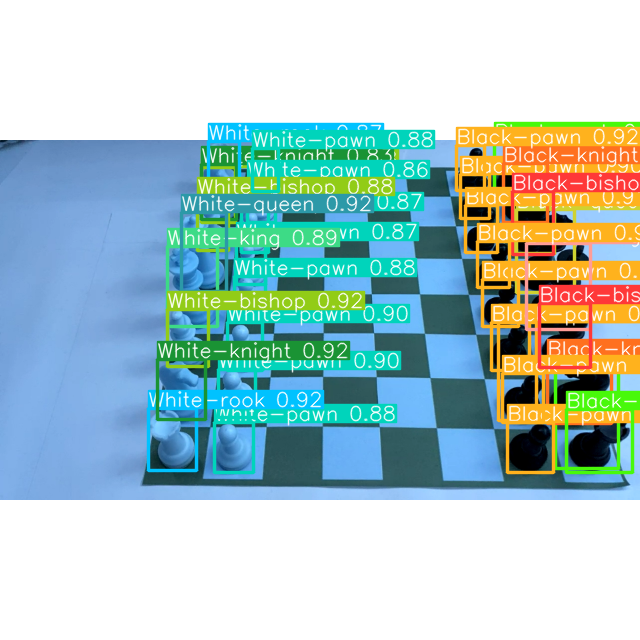

,xmin,ymin,xmax,ymax,confidence,class,name
0,566.804382,409.096222,632.243713,472.044952,0.933243,5,Black-rook
1,539.684692,303.720184,590.947388,367.679901,0.927168,0,Black-bishop
2,502.208862,373.427887,543.531250,422.022369,0.924133,3,Black-pawn
3,477.533936,241.392929,509.490112,287.620911,0.922883,3,Black-pawn
4,507.572449,422.248169,553.077332,472.574280,0.922791,3,Black-pawn
5,526.917297,243.398804,590.802917,329.311218,0.922670,1,Black-king
6,491.051666,322.718536,529.158997,370.942291,0.922489,3,Black-pawn
7,157.446442,359.673157,205.266815,419.930176,0.921062,8,White-knight
8,456.287415,145.921341,484.052002,190.344162,0.918422,3,Black-pawn
9,167.404327,309.002380,208.477997,366.513062,0.916768,6,White-bishop


In [22]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='training_results/runs/train/results_yolov5m/exp5/weights/best.pt')  # local model

#model.conf = 0.7  # NMS confidence threshold
#iou = 0.45  # NMS IoU threshold
#agnostic = False  # NMS class-agnostic
#multi_label = False  # NMS multiple labels per box
#classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
#max_det = 1000  # maximum number of detections per image
#amp = False  # Automatic Mixed Precision (AMP) inference

#path_to_image = 'testimages/withFigures.jpg'
#image = cv2.imread(path_to_image)
image = __get_chessboard_image()
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Inference
#results = model(image)
results = model(image, augment=True)

results.show()

res = results.pandas().xyxy[0]
results.pandas().xyxy[0]


In [23]:
print(res.to_json(orient="records"))
data_json = res.to_json(orient="records")

[{"xmin":566.8043823242,"ymin":409.0962219238,"xmax":632.2437133789,"ymax":472.0449523926,"confidence":0.9332429767,"class":5,"name":"Black-rook"},{"xmin":539.6846923828,"ymin":303.7201843262,"xmax":590.9473876953,"ymax":367.679901123,"confidence":0.927167654,"class":0,"name":"Black-bishop"},{"xmin":502.2088623047,"ymin":373.4278869629,"xmax":543.53125,"ymax":422.0223693848,"confidence":0.9241325259,"class":3,"name":"Black-pawn"},{"xmin":477.5339355469,"ymin":241.3929290771,"xmax":509.4901123047,"ymax":287.6209106445,"confidence":0.9228833318,"class":3,"name":"Black-pawn"},{"xmin":507.5724487305,"ymin":422.2481689453,"xmax":553.077331543,"ymax":472.5742797852,"confidence":0.922791481,"class":3,"name":"Black-pawn"},{"xmin":526.9172973633,"ymin":243.3988037109,"xmax":590.8029174805,"ymax":329.3112182617,"confidence":0.9226703644,"class":1,"name":"Black-king"},{"xmin":491.0516662598,"ymin":322.718536377,"xmax":529.158996582,"ymax":370.9422912598,"confidence":0.9224885702,"class":3,"name":

# YOLOv8

In [73]:
from ultralytics import YOLO
import json

model = YOLO(f'training_results/runs/train/results_yolov8m/exp2/weights/best.pt')

# Run inference on an image
image = __get_chessboard_image()
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

results = model(image)
# Visualize the results on the frame
annotated_frame = results[0].plot()

# Display the annotated frame
cv2.imshow("YOLOv8 Inference", annotated_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

data_json = results[0].tojson()
print(data_json)

NameError: name '__get_chessboard_image' is not defined

In [24]:
import cv2
import json

# Parse the JSON data
data = json.loads(data_json)

# Initialize a list to store the resulting coordinates
chess_figures = []

# Iterate through each bounding box and calculate the point
for item in data:
    try: #YOLOv5 format
        xmin = item["xmin"]
        xmax = item["xmax"]
        ymin = item["ymin"]
        ymax = item["ymax"]
    except KeyError: #YOLOv8 format
        xmin = item["box"]["x1"]
        xmax = item["box"]["x2"]
        ymin = item["box"]["y1"]
        ymax = item["box"]["y2"]

    # Calculate the x and y coordinates of the point
    x_point = int((xmin + xmax) / 2)
    y_point = int(ymin + (3 * (ymax - ymin)) / 4)  # 1/4th from the bottom
    
    # Draw a point or circle on the image
    cv2.circle(image, (x_point, y_point), 5, (0, 0, 255), -1)  # Red circle with a radius of 5 pixels

    # Get class ID and name
    class_id = item["class"]
    class_name = item["name"]
    confidence = item["confidence"]

    # Append the resulting coordinates to the list
    chess_figures.append({
        "x_point": x_point,
        "y_point": y_point,
        "class_id": class_id,
        "class_name": class_name,
        "confidence:": confidence
    })

print(chess_figures)
# Display the image with points/circles
cv2.imshow("Image with Points", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[{'x_point': 599, 'y_point': 456, 'class_id': 5, 'class_name': 'Black-rook', 'confidence:': 0.9332429767}, {'x_point': 565, 'y_point': 351, 'class_id': 0, 'class_name': 'Black-bishop', 'confidence:': 0.927167654}, {'x_point': 522, 'y_point': 409, 'class_id': 3, 'class_name': 'Black-pawn', 'confidence:': 0.9241325259}, {'x_point': 493, 'y_point': 276, 'class_id': 3, 'class_name': 'Black-pawn', 'confidence:': 0.9228833318}, {'x_point': 530, 'y_point': 459, 'class_id': 3, 'class_name': 'Black-pawn', 'confidence:': 0.922791481}, {'x_point': 558, 'y_point': 307, 'class_id': 1, 'class_name': 'Black-king', 'confidence:': 0.9226703644}, {'x_point': 510, 'y_point': 358, 'class_id': 3, 'class_name': 'Black-pawn', 'confidence:': 0.9224885702}, {'x_point': 181, 'y_point': 404, 'class_id': 8, 'class_name': 'White-knight', 'confidence:': 0.9210617542}, {'x_point': 470, 'y_point': 179, 'class_id': 3, 'class_name': 'Black-pawn', 'confidence:': 0.9184216857}, {'x_point': 187, 'y_point': 352, 'class_id'

In [25]:
def point_in_square(point, square):
    x, y = point['x_point'], point['y_point']
    corner_a_x, corner_a_y = square['corner_a']
    corner_b_x, corner_b_y = square['corner_b']
    corner_c_x, corner_c_y = square['corner_c']
    corner_d_x, corner_d_y = square['corner_d']

    if corner_a_x <= x <= corner_b_x and corner_a_y <= y <= corner_d_y:
        return True
    return False

points_in_squares = {square_name: [] for square_name in grid.keys()}

for point in chess_figures:
    for square_name, square_corners in grid.items():
        if point_in_square(point, square_corners):
            existing_points = points_in_squares[square_name]
            if not existing_points:
                # If no points exist in the square, add the current point
                points_in_squares[square_name].append(point)
            else:
                # Check if the current point has a higher confidence score
                max_confidence = max(existing_points, key=lambda p: p['confidence:'])
                if point['confidence:'] > max_confidence['confidence:']:
                    # Replace the existing point with the current point
                    points_in_squares[square_name].remove(max_confidence)
                    points_in_squares[square_name].append(point)

print(points_in_squares)

#for square_name, square_points in points_in_squares.items():
#    print(f'Points in square {square_name}: {len(square_points)}')
#    for point in square_points:
#        print(f' - {point}')

{'a1': [{'x_point': 224, 'y_point': 180, 'class_id': 11, 'class_name': 'White-rook', 'confidence:': 0.8721605539}], 'a2': [{'x_point': 265, 'y_point': 181, 'class_id': 9, 'class_name': 'White-pawn', 'confidence:': 0.8826338053}], 'a3': [], 'a4': [], 'a5': [], 'a6': [], 'a7': [{'x_point': 470, 'y_point': 179, 'class_id': 3, 'class_name': 'Black-pawn', 'confidence:': 0.9184216857}], 'a8': [{'x_point': 514, 'y_point': 179, 'class_id': 5, 'class_name': 'Black-rook', 'confidence:': 0.8993084431}], 'b1': [{'x_point': 219, 'y_point': 206, 'class_id': 8, 'class_name': 'White-knight', 'confidence:': 0.8282431364}], 'b2': [{'x_point': 261, 'y_point': 211, 'class_id': 9, 'class_name': 'White-pawn', 'confidence:': 0.8645592332}], 'b3': [], 'b4': [], 'b5': [], 'b6': [], 'b7': [{'x_point': 474, 'y_point': 207, 'class_id': 3, 'class_name': 'Black-pawn', 'confidence:': 0.9033405781}], 'b8': [{'x_point': 525, 'y_point': 207, 'class_id': 2, 'class_name': 'Black-knight', 'confidence:': 0.9143577218}], 'c

In [26]:
recognized_pieces = []

for square_name, points in points_in_squares.items():
    if points:
        max_confidence_point = max(points, key=lambda p: p['confidence:'])
        class_name = max_confidence_point['class_name']
        recognized_pieces.append({'square': square_name, 'class_name': class_name})

print(recognized_pieces)
for piece in recognized_pieces:
    print(piece)

[{'square': 'a1', 'class_name': 'White-rook'}, {'square': 'a2', 'class_name': 'White-pawn'}, {'square': 'a7', 'class_name': 'Black-pawn'}, {'square': 'a8', 'class_name': 'Black-rook'}, {'square': 'b1', 'class_name': 'White-knight'}, {'square': 'b2', 'class_name': 'White-pawn'}, {'square': 'b7', 'class_name': 'Black-pawn'}, {'square': 'b8', 'class_name': 'Black-knight'}, {'square': 'c1', 'class_name': 'White-bishop'}, {'square': 'c2', 'class_name': 'White-pawn'}, {'square': 'c7', 'class_name': 'Black-pawn'}, {'square': 'c8', 'class_name': 'Black-bishop'}, {'square': 'd1', 'class_name': 'White-queen'}, {'square': 'd2', 'class_name': 'White-pawn'}, {'square': 'd7', 'class_name': 'Black-pawn'}, {'square': 'd8', 'class_name': 'Black-queen'}, {'square': 'e1', 'class_name': 'White-king'}, {'square': 'e2', 'class_name': 'White-pawn'}, {'square': 'e7', 'class_name': 'Black-pawn'}, {'square': 'e8', 'class_name': 'Black-king'}, {'square': 'f1', 'class_name': 'White-bishop'}, {'square': 'f2', 'cla

[['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'], ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'], ['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R']] 

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR


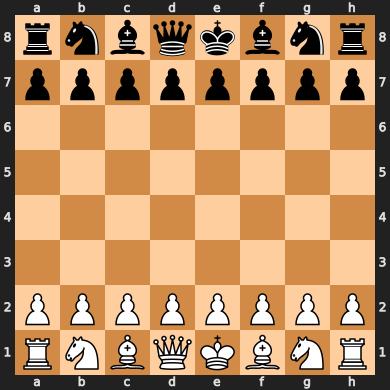

In [27]:
import chess
import chess.svg

# Initialize an empty 8x8 chessboard grid with spaces
chessboard = [[' ' for _ in range(8)] for _ in range(8)]

# Define a mapping of piece class names to FEN symbols
piece_mapping = {
    'White-king': 'K',
    'White-queen': 'Q',
    'White-rook': 'R',
    'White-bishop': 'B',
    'White-knight': 'N',
    'White-pawn': 'P',
    'Black-king': 'k',
    'Black-queen': 'q',
    'Black-rook': 'r',
    'Black-bishop': 'b',
    'Black-knight': 'n',
    'Black-pawn': 'p',
}

# Place the pieces on the chessboard grid
for piece in recognized_pieces:
    square = piece['square']
    class_name = piece['class_name']
    row = 8 - int(square[1])
    col = ord(square[0]) - ord('a')
    chessboard[row][col] = piece_mapping[class_name]

print(chessboard, '\n')

# Generate the FEN string
fen = '/'.join([''.join(row) for row in chessboard])
fen = fen.replace(' ' * 8, '8')  # Replace consecutive empty squares with their count
fen = fen.replace(' ' * 7, '7')
fen = fen.replace(' ' * 6, '6')
fen = fen.replace(' ' * 5, '5')
fen = fen.replace(' ' * 4, '4')
fen = fen.replace(' ' * 3, '3')
fen = fen.replace(' ' * 2, '2')
fen = fen.replace(' ' * 1, '1')

# Print the FEN string
print(fen)
board = chess.Board(fen=fen)

board